## Домашнее задание №1
### Гусев Владислав БЭК212
Занимательный факт обо мне: я не умею оптимизировать код

<ins>**Необходимые билиотеки**</ins>

In [137]:
import random
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline

import random

import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import expon

from scipy.stats.stats import pearsonr
import os

Ассистент, проверящюй мою домашку, ждет 30 минут, пока Портос с помощью своего максимально неэффективного кода с циклами проведет 10000 экспериментов:

![meme.gif](https://media.tenor.com/SK3AQwmshiIAAAAd/kumala-la-kumala.gif)

### <ins>**Задача №1. Парадокс инспектора**</ins>

#### Пункт а)

In [140]:
# Решение пункта a). Функция, которая выдает количество автобусов, отошеднее от станции за 1 день

random.seed(42)
def get_sample():
    time_s = 0
    count = 0
    my_array = np.array([])
    random_rv = np.random.choice([5, 10], 1)[0]
    while time_s <= 720:
        random_rv = np.random.choice([5, 10], 1)[0]
        time_s += random_rv
        my_array = np.append(my_array, random_rv)
        count += 1
    return count

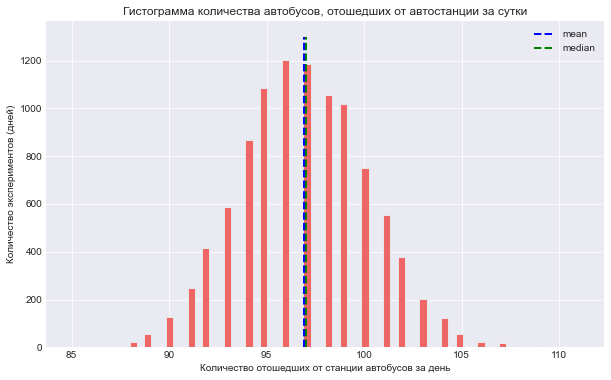

In [141]:
# Решение пункта a). Проведение 10**4 экспериментов и построение соответствующей гистограммы
random.seed(42)
n_iter = 10**4
statistika = [get_sample() for i in range(n_iter)]
plt.figure(figsize=(10,6))
plt.hist(statistika, bins=70, rwidth = 2, edgecolor='#E6E6E6', color='#EE6666')
plt.ylabel('Количество экспериментов (дней)')
plt.xlabel('Количество отошедших от станции автобусов за день')
plt.title('Гистограмма количества автобусов, отошедших от автостанции за сутки')
plt.vlines(np.mean(statistika), 0, 1300, color='blue', lw=2, linestyles='--', label='mean')
plt.vlines(np.median(statistika), 0, 1300, color='green', lw=2, linestyles='--', label='median')
plt.legend();
None

**Вывод:** Данное распределение похоже на нормальное, но оно задано дискретно (так как соответствующие интервалы между значениями равновероятны 5 и 10 минутам)

#### Оценка матожидания и дисперсии:
Как известно из курса математической статистики, лучшей оценкой матожидания выборки, является среднее данной выборки. Для оценки дисперсии воспользуемся уже установленной в библиотеке нампая формулой выборочной дисперсии

In [149]:
# Выборочное среднее уже было посчитано на графике, но запишем еще раз:
E = np.round(np.mean(statistika), decimals = 2)
# Посчитаем дисперсию:
Var = np.round(np.var(statistika), decimals = 2)
print('Матожидание выборки рано', E, 'а дисперсия равна', Var)

Матожидание выборки рано 96.9 а дисперсия равна 10.72


#### Пункт б)

In [150]:
# Решение пункта б). Получение функции, которая указывает количество людей в каждом автобусе
np.random.seed(42)
def get_sample1():
    np.random.seed(42)
    time_s = 0
    count = 0
    my_array = np.array([])
    random_rv = np.random.choice([5, 10], 1)[0] # равновероятные промежутки времени, в которые может отходить автобус
    while time_s <= 720: # временной формат переведен в минуты. 0 - 8:00, 720 - 20:00
        random_rv = int(np.random.choice([5, 10], 1)[0])
        time_s += random_rv
        my_array = np.append(my_array, random_rv)
        count += 1
    list_of_bus = list(range(0, count))
    list_of_pass = my_array.astype(int).tolist()
    return list_of_pass, list_of_bus
x = get_sample1()[0] # список промежутков, через которые уходил автобусы = количество людей, сидящих в них
y = get_sample1()[1] # порядковый номер автобуса
matrizz = np.array([x,y])

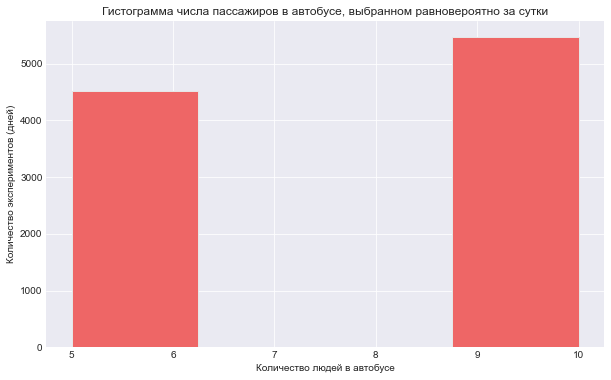

In [151]:
# Решение пункта б). 
np.random.seed(42)
n_iter = 10**4
sample = np.random.choice(x, n_iter) # выбирается произвольный автобус (и, соответственно, промежуток времени)
plt.figure(figsize=(10,6))
plt.hist(sample, bins = 4, edgecolor='#E6E6E6', color='#EE6666')
plt.ylabel('Количество экспериментов (дней)')
plt.xlabel('Количество людей в автобусе')
plt.title('Гистограмма числа пассажиров в автобусе, выбранном равновероятно за сутки')
None

**Вывод:** Вероятность сесть в автобус с 5 людьми и с 10 одинакова, что и приблизительно демострирует гистограмма. Если инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки, он при большом количестве экспериментов придет к выводу, что он может практически равновероятно как в автобус с 5 людьми, так и с 10

In [152]:
# Выборочное среднее:
E = np.round(np.mean(sample), decimals = 2)
# Посчитаем дисперсию выборки:
Var = np.round(np.var(sample), decimals = 2)
print('Матожидание выборки рано', E, 'а дисперсия равна', Var)

Матожидание выборки рано 7.74 а дисперсия равна 6.19


#### Пункт в)

In [153]:
# Решение пункта в). Функция возвращает количество людей в автобусе с учетом произвольного момента времени прихода Пумбы
np.random.seed(10)
def get_sample2():
    samplee = np.random.choice(range(720), 1)[0] # выбирается произвольный момент времени
    time_s = 0
    count = 0
    my_array = np.array([])
    random_rv = np.random.choice([5, 10], 1)[0] # равновероятные интервалы отхода автобуса
    while time_s < samplee:
        random_rv = int(np.random.choice([5, 10], 1)[0])
        time_s += random_rv
        my_array = np.append(my_array, random_rv)
        count += 1
    if len(my_array) == 0:
        pasager = 0
    else:
        pasager = my_array[-1]
    return int(pasager)

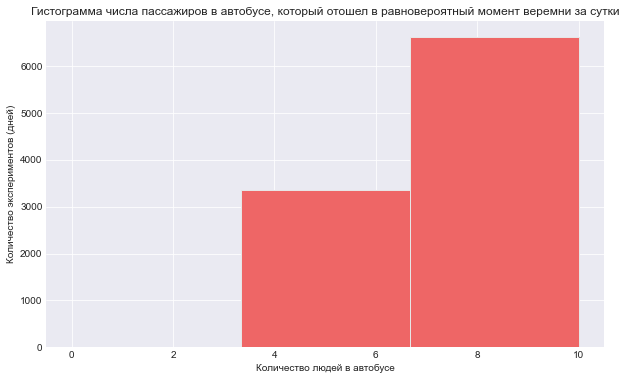

In [154]:
# Решение пункта в).
np.random.seed(10)
n_iter = 10**4
statistika1 = [get_sample2() for i in range(n_iter)]
plt.figure(figsize=(10,6))
plt.hist(statistika1 , bins = 3, edgecolor='#E6E6E6', color='#EE6666')
plt.ylabel('Количество экспериментов (дней)')
plt.xlabel('Количество людей в автобусе')
plt.title('Гистограмма числа пассажиров в автобусе, который отошел в равновероятный момент веремни за сутки')
None

**Вывод:** Большая вероятность сесть в автобус с 10 людьми (в этом и заключается парадокс), так как в общей сумме десятиминутных ожиданий пропорционально больше пятиминутным, хотя они и равновероятны на первый взгляд. В произвольный момент времени больше вероятность попасть в 10-минутный интервал, так как они занимают большую часть дня, хотя и равновероятны

In [155]:
# Выборочное среднее:
E = np.round(np.mean(statistika1), decimals = 2)
# Посчитаем дисперсию выборки:
Var = np.round(np.var(statistika1), decimals = 2)
print('Матожидание выборки рано', E, 'а дисперсия равна', Var)

Матожидание выборки рано 8.31 а дисперсия равна 5.65


#### Пункт г)

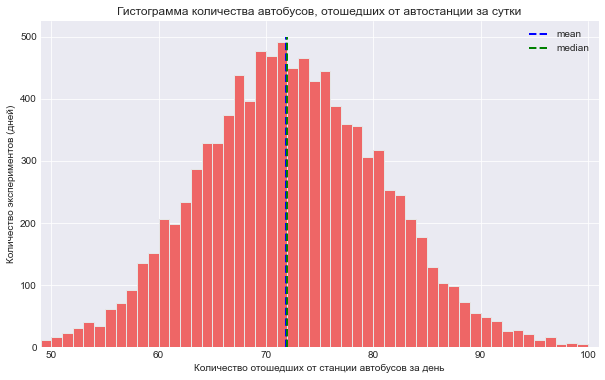

In [156]:
# Первый подпукнт, аналог пункта a)
np.random.seed(42)

def get_sample3():
    periods = expon.rvs(scale = 10, size = 10000)
    periods1 = np.cumsum(periods)
    result = np.where(periods1 <= 720)
    result_itog = periods1[result].tolist()
    busus = list(range(len(result_itog)))
    rixx = np.array([result_itog, busus])
    x = len(result_itog)
    return x

n_iter = 10**4
statistika2 = [get_sample3() for i in range(n_iter)]
plt.figure(figsize=(10,6))
plt.hist(statistika2, bins = 70, rwidth = 2, edgecolor='#E6E6E6', color='#EE6666')
plt.ylabel('Количество экспериментов (дней)')
plt.xlabel('Количество отошедших от станции автобусов за день')
plt.title('Гистограмма количества автобусов, отошедших от автостанции за сутки')
plt.vlines(np.mean(statistika2), 0, 500, color='blue', lw=2, linestyles='--', label='mean')
plt.vlines(np.median(statistika2), 0, 500, color='green', lw=2, linestyles='--', label='median')
plt.xlim((49, 101)) 
plt.legend();
None

**Вывод:** В данном случае распределение уже не дискретно, поэтому теперь его с уверенностью можно назвать нормальным. Ниже рассчитаны примерные параметры нормального распределения, описывающие данную выборку. 

In [158]:
# Выборочное среднее:
E = np.round(np.mean(statistika2), decimals = 2)
# Посчитаем дисперсию выборки:
Var = np.round(np.var(statistika2), decimals = 2)
print('Матожидание выборки рано', E, 'а дисперсия равна', Var)

Матожидание выборки рано 71.9 а дисперсия равна 72.4


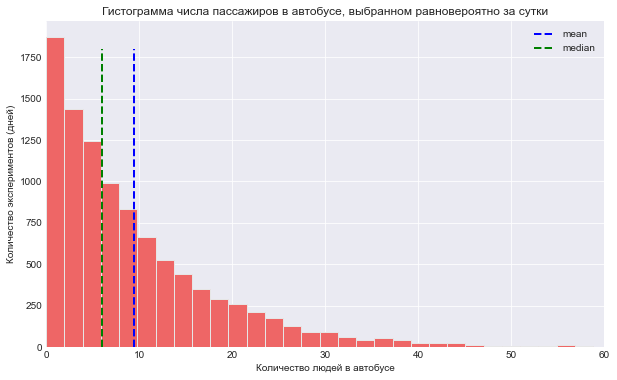

In [159]:
# Второй подпункт, аналог пункта б)
np.random.seed(42)

def get_sample4():
    periods = expon.rvs(scale = 10, size = 10000)
    periods1 = np.cumsum(periods)
    result = np.where(periods1 <= 720)[0]
    periodss = np.floor(periods[0:len(result)]).tolist() # сколько людей отъехало в каждом автобусе
    numbas = list(range(len(periodss))) # порядковые номера автобусов
    matrizzz = np.array([periodss, numbas]) # матрица с количествами пассажиров в каждом автобусе
    timon = int(np.random.choice(numbas))
    po = int(matrizzz[:,timon][0]) # выдает столбец матрицы, с заданным количеством пасажжиров и номером автобуса
    # потом берет только первый элемент, отвечающий за количество пассажиров в автобусе тимона и берет от него инт.
    return po

n_iter = 10**4
statistika3 = [get_sample4() for i in range(n_iter)]
plt.figure(figsize=(10,6))
plt.hist(statistika3, bins = 50, edgecolor='#E6E6E6', color='#EE6666')
plt.ylabel('Количество экспериментов (дней)')
plt.xlabel('Количество людей в автобусе')
plt.title('Гистограмма числа пассажиров в автобусе, выбранном равновероятно за сутки')
plt.vlines(np.mean(statistika3), 0, 1800, color='blue', lw=2, linestyles='--', label='mean')
plt.vlines(np.median(statistika3), 0, 1800, color='green', lw=2, linestyles='--', label='median')
plt.xlim((0, 60))
plt.legend();
None

**Вывод:** Данная выборка распределена экспоненциально и средняя по выборке равна матожиданию. Здесь не прослеживается парадокс инспекции, так как автобусы выбираются равновероятно. А в следующем пункте как раз будет показаны различия.

In [160]:
# Выборочное среднее:
E = np.round(np.mean(statistika3), decimals = 2)
# Посчитаем дисперсию выборки:
Var = np.round(np.var(statistika3), decimals = 2)
print('Матожидание выборки рано', E, 'а дисперсия равна', Var)

Матожидание выборки рано 9.42 а дисперсия равна 100.46


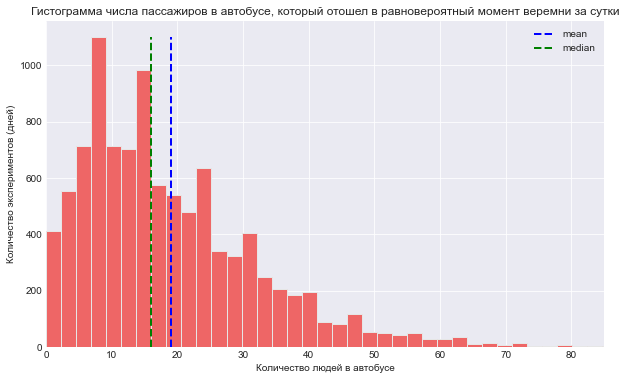

In [165]:
# Третий подпункт, аналог пункта в)
np.random.seed(42)

def get_sample5():
    samplino = np.random.choice(range(720), 1)[0]
    periods = expon.rvs(scale = 10, size = 10000)
    periods1 = np.cumsum(periods)
    result = np.where(periods1 <= 720)
    x = periods1[result]
    y = np.where(x<samplino)[0]
    if (x[-1] < samplino) & (len(x) != 0) & (x[0] != x[-1]):
        pasager = int(np.floor(720 - x[-1]))
    elif (samplino < x[0]) & (len(x) != 0) & (x[0] != x[-1]):
        pasager = int(np.floor(x[0]))
    else:
        pasager = int(np.floor(x[y+1][-1] - x[y][-1]))
    return pasager

n_iter = 10**4
statistika4 = [get_sample5() for i in range(n_iter)]
plt.figure(figsize=(10,6))
plt.hist(statistika4, bins = 45, edgecolor='#E6E6E6', color='#EE6666')
plt.ylabel('Количество экспериментов (дней)')
plt.xlabel('Количество людей в автобусе')
plt.title('Гистограмма числа пассажиров в автобусе, который отошел в равновероятный момент веремни за сутки')
plt.vlines(np.mean(statistika4), 0, 1100, color='blue', lw=2, linestyles='--', label='mean')
plt.vlines(np.median(statistika4), 0, 1100, color='green', lw=2, linestyles='--', label='median')
plt.xlim((0, 85))
plt.legend();
None

**Вывод:** Данное выборка распределена экспоненциально. В равновероятный момент времени среднее количество людей в автобусе равно 19. Данная величина отличается от предыдущего пункта и от заданного матожидания распределения (лямбды), так как во времени большая вероятность попасть в более протяженный интервал ожидания. В этом заключается парадкос инспекции.

In [162]:
# Выборочное среднее:
E = np.round(np.mean(statistika4), decimals = 2)
# Посчитаем дисперсию выборки:
Var = np.round(np.var(statistika4), decimals = 2)
print('Матожидание выборки рано', E, 'а дисперсия равна', Var)

Матожидание выборки рано 18.99 а дисперсия равна 189.0


### <ins>**Задача №2. Парадокс Хуана Мануэля Родригеса Паррондо**</ins>

#### Пункт а)

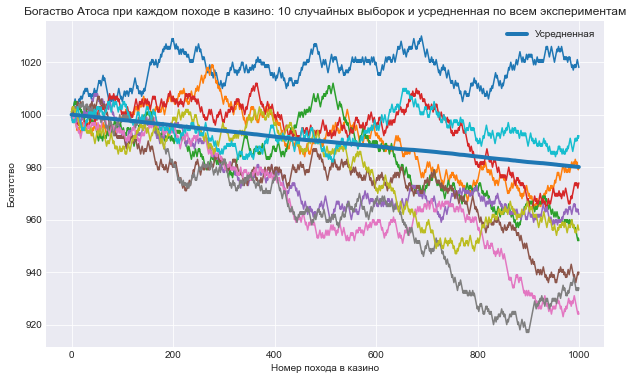

In [4]:
# Пункт а) про Атоса
np.random.seed(42)

def get_sample6():
    atos = 1000
    ans = np.random.choice([-1, 1], 1000, p = [0.51, 0.49])
    ans = np.cumsum(ans)
    dyn = atos + ans # как меняется богатство атоса с каждым походом в казино
    pohod = list(range(1000))
    matrixz = np.array([dyn,pohod])
    return dyn, pohod

x = get_sample6()[1] # номер похода в казино
y1 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y2 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y3 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y4 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y5 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y6 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y7 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y8 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y9 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
y10 = get_sample6()[0] # динамика богатства в каждой из 10 симуляций
yY = [get_sample6()[0] for m in range(10**4)] # динамика богатства по всем симуляциям
z = np.mean(yY, axis = 0) # средняя по всем симуляциям при каждом походе в казино

plt.figure(figsize=(10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5, x, y6 ,x , y7, x , y8, x, y9, x, y10)
plt.plot(x, z, label = 'Усредненная', linewidth = 4)
plt.ylabel('Богатство')
plt.xlabel('Номер похода в казино')
plt.title('Богаство Атоса при каждом походе в казино: 10 случайных выборок и усредненная по всем экспериментам')
# построена траектория изменения богатства в 10 экспериментах и усредненная за все 10**4 экспериментов
plt.legend();
None

**Вывод:** Отражается отрицательная динамика изменения богатства Атоса, так как вероятность проиграть 1 на 0.01 больше, чем выйграть 1. На 10 экспериментах это не так заментно, но на 10^4 экспериментах четко выделяется тренд. Данное казино в среднем является проигрышным

#### Пункт б)

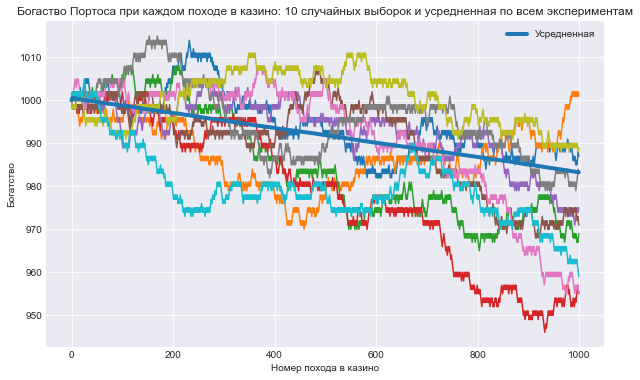

In [166]:
## ПРЕДУПРЕЖДЕНИЕ: для того, чтобы график загрузился, необходимо подождать минут 7
# Решение пункта б). Создадим функцию, которая будет отражать динамику изменения богатства Портоса
np.random.seed(42)

def get_sample7():
    n_pohod = 1000
    portos = [1000]
    counti = 0
    pohod = list(range(1000))
    while counti <= n_pohod - 2:
        if portos[-1] % 3 == 0:
            ans = portos[-1] + np.random.choice([-1, 1], 1, p = [0.91, 0.09])[0]
            portos = np.append(portos, ans)
            counti += 1
        else:
            ans = portos[-1] + np.random.choice([-1, 1], 1, p = [0.26, 0.74])[0]
            portos = np.append(portos, ans)
            counti += 1
    return portos, pohod

x = get_sample7()[1] # номер похода в казино
y1 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y2 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y3 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y4 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y5 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y6 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y7 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y8 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y9 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
y10 = get_sample7()[0] # динамика богатства в каждой из 10 симуляций
yY = [get_sample7()[0] for m in range(10**4)] # динамика богатства по всем симуляциям
z = np.mean(yY, axis = 0) # средняя по всем симуляциям при каждом походе в казино

plt.figure(figsize=(10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5, x, y6 ,x , y7, x , y8, x, y9, x, y10)
plt.plot(x, z, label = 'Усредненная', linewidth = 4)
plt.ylabel('Богатство')
plt.xlabel('Номер похода в казино')
plt.title('Богаство Портоса при каждом походе в казино: 10 случайных выборок и усредненная по всем экспериментам')
# построена траектория изменения богатства в 10 экспериментах и усредненная за все 10**4 экспериментов
plt.legend();
None

**Вывод:** Заметен отрицательный тренд изменения богатства Портоса. Таким образом, данное казино также в среднем является проигрышным.

#### Пункт в)

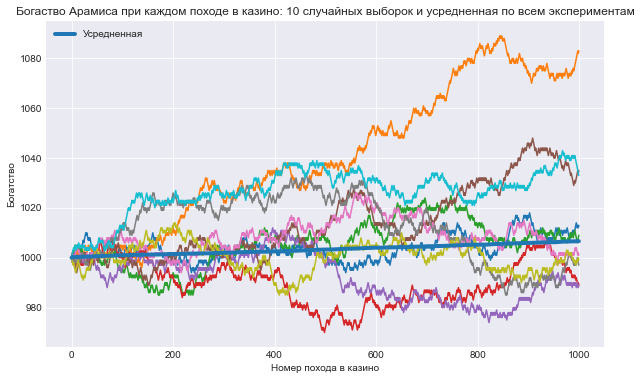

In [10]:
## ПРЕДУПРЕЖДЕНИЕ: для того, чтобы график загрузился, необходимо подождать немногими больше 10 минут
# Решение пункта в). Создадим функцию, которая будет отражать динамику изменения богатства Арамиса.
# Она будет состоять из равновероятного вывода функций богатства Атоса и Портоса
np.random.seed(42)

def get_sample8():
    n_pohod = 1000
    aramis = [1000]
    pohod = list(range(1000))
    for i in range(n_pohod-1):
        casio = np.random.choice([-1, 1], 1, p = [0.5, 0.5])
        if casio == -1:
            ans = aramis[-1] + np.random.choice([-1, 1], 1, p = [0.51, 0.49])
            aramis = np.append(aramis, ans)
        else:
            if aramis[-1] % 3 == 0:
                ans = aramis[-1] + np.random.choice([-1, 1], 1, p = [0.91, 0.09])[0]
                aramis = np.append(aramis, ans)
            else:
                ans = aramis[-1] + np.random.choice([-1, 1], 1, p = [0.26, 0.74])[0]
                aramis = np.append(aramis, ans)
    return aramis, pohod
x = get_sample8()[1] # номер похода в казино
y1 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y2 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y3 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y4 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y5 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y6 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y7 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y8 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y9 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
y10 = get_sample8()[0] # динамика богатства в каждой из 10 симуляций
yY = [get_sample8()[0] for m in range(10**4)] # динамика богатства по всем симуляциям
z = np.mean(yY, axis = 0) # средняя по всем симуляциям при каждом походе в казино

plt.figure(figsize=(10,6))
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5, x, y6 ,x , y7, x , y8, x, y9, x, y10)
plt.plot(x, z, label = 'Усредненная', linewidth = 4)
plt.ylabel('Богатство')
plt.xlabel('Номер похода в казино')
plt.title('Богаство Арамиса при каждом походе в казино: 10 случайных выборок и усредненная по всем экспериментам')
# построена траектория изменения богатства в 10 экспериментах и усредненная за все 10**4 экспериментов
plt.legend();
None

**Вывод:** Парадокс Парондо налицо: в прошлых пунктах стало известно, что оба казино по отдельности не дают на большом числе экспериментов положительного роста богатства, хотя на данном графике заметен невыраженный положительный тренд изменения богатства. А все дело в том, что проигрышные стратегии выбираются равновероятно, что дает возможность в некоторых комбинациях давать положительный результат.

Самое неприятное для Арамиса ситуация, когда его богатства кратно 3 и он проигрывает франк с вероятностью 0,91. Но в данном случае, когда казино он выбирает равновероятно, данный случай может наступить с меннее критичным условием в казино А, где проигрыш франка возможен с вероятностью 0,51. А если брать равновероятно А и Б, когда богатство не кратно 3, то общая тентенция богаства будет положительной, засчет того, что вероятность выйгрыша в казино Б, равная 0,74, будет перевешивать возможные проигрыши. В этом и заключается парадокс Паррондо.

### <ins>**Задача №3. Парадокс Берксона**</ins>

#### Пункт а)

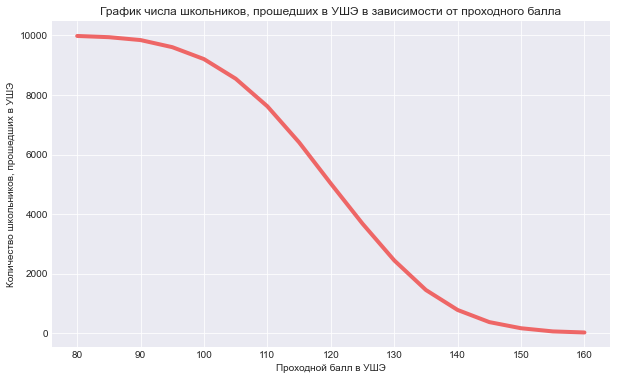

In [133]:
# Решение пункта а).
np.random.seed(42)

n_shkolnik = 10**4
norm_rv = stats.norm(loc=60, scale=10) 
rus = norm_rv.rvs(n_shkolnik)
mat = norm_rv.rvs(n_shkolnik)
matriz = np.concatenate((rus,mat), axis = 0).reshape(-1,2)
matriz = np.sum(matriz, axis = 1)
prohod = np.arange(80,161, 5)
spisok = np.array([], dtype = 'int64') #число прошедших в УШЭ в зависимости от n
for i in range(len(prohod)):
    x = matriz > prohod[i]
    x = np.sum(x)
    proshli = x
    spisok = np.append(spisok, proshli)

plt.figure(figsize=(10,6))
plt.plot(prohod, spisok, color='#EE6666')
plt.ylabel('Количество школьников, прошедших в УШЭ')
plt.xlabel('Проходной балл в УШЭ')
plt.title('График числа школьников, прошедших в УШЭ в зависимости от проходного балла')
None

**Вывод:** Ярко выраженная обратная зависимость между проходным баллом и числом школьников, поступивших в УШЭ. Все потому, что баллы распределены с параметрами N(60,10).

#### Пункт б)

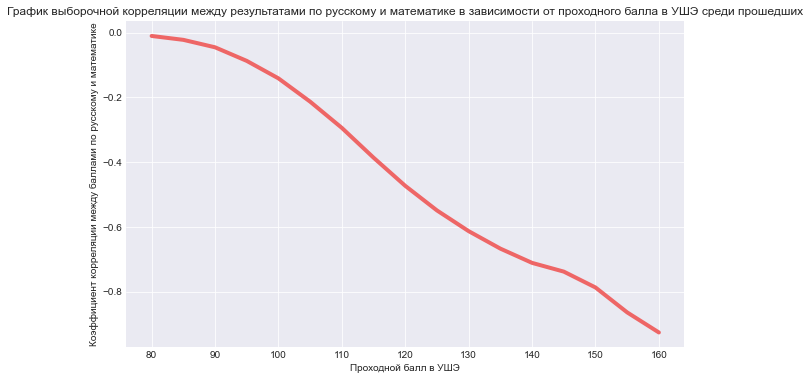

In [134]:
# Решение пункта б). Рассмотрим прошедших в УШЭ
np.random.seed(42)

n_shkolnik = 10**4
norm_rv = stats.norm(loc=60, scale=10) 
rus = norm_rv.rvs(n_shkolnik)
mat = norm_rv.rvs(n_shkolnik)
matriz = np.concatenate((rus,mat), axis = 0).reshape(-1,2)
matriz_sum = np.sum(matriz, axis = 1).reshape(-1,1)
matrizz = np.append(matriz, matriz_sum, axis = 1) # матрица с результатами по каждому предмету и их сумма

prohod = np.arange(80,161, 5).reshape(-1,1) # все варианты проходных баллов
good_spisok = np.array([], dtype = 'int64') #сюда закинем корреляцию и добавим проходные баллы

for i in range(len(prohod)):
    spisok = np.array(matrizz[matrizz[:, -1] > prohod[i]][:,0:2]) # баллы по русскому и математике у тех, кто прошел
    trans0 = spisok[:, 0]
    trans1 = spisok[:, 1]
    corelyatsiya = (pearsonr(trans0, trans1))[0]
    good_spisok = np.append(good_spisok, corelyatsiya)
    good_spisok = np.around(np.array(good_spisok.reshape(-1,1)), decimals = 3)
np.set_printoptions(suppress=True)
good_spisok = np.column_stack([good_spisok, prohod])

plt.figure(figsize=(10,6))
plt.plot(good_spisok[:, 1], good_spisok[:, 0], linewidth = 4, color='#EE6666')
plt.ylabel('Коэффициент корреляции между баллами по русскому и математике')
plt.xlabel('Проходной балл в УШЭ')
plt.title('График выборочной корреляции между результатами по русскому и математике в зависимости от проходного балла в УШЭ среди прошедших')
None

**Вывод**: С ростом проходного балла в УШЭ коэффициент корреляции между результатами по русскому и математике по модулю увеличивается. С ростом проходного балла в УШЭ отрицательная зависимость между результатами экзаменов увеличивается.

С увеличением проходного балла наша выборка сужается. Удобнее это было бы отобразить на точечной диаграмме: по осям отложены баллы за экзамен и кривая с отрицательным наклоном двигается вправо вверх(увеличение среднего балла по обоим предметам для прохождения по конкурсу). Таким образом, чем больше ограничивается выборка, тем большая отрицательная зависимость создается

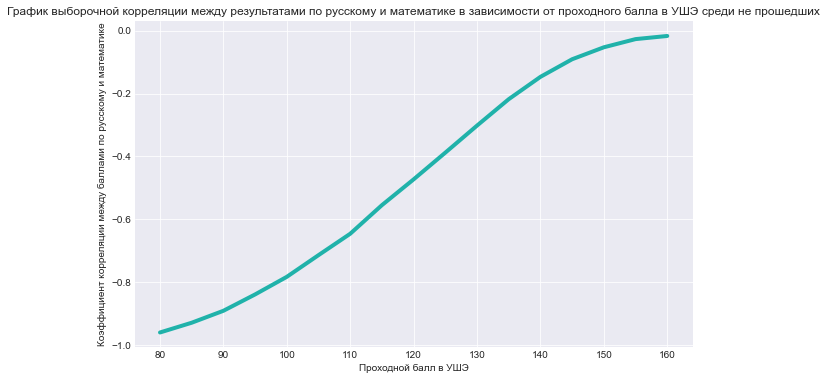

In [135]:
# Решение пункта в). На сей раз рассмотрим не прошедших в УШЭ
np.random.seed(42)

n_shkolnik = 10**4
norm_rv = stats.norm(loc=60, scale=10) 
rus = norm_rv.rvs(n_shkolnik)
mat = norm_rv.rvs(n_shkolnik)
matriz = np.concatenate((rus,mat), axis = 0).reshape(-1,2)
matriz_sum = np.sum(matriz, axis = 1).reshape(-1,1)
matrizz = np.append(matriz, matriz_sum, axis = 1) # матрица с результатами по каждому предмету и их сумма

prohod = np.arange(80,161, 5).reshape(-1,1) # все варианты проходных баллов
good_spisok = np.array([], dtype = 'int64') #сюда закинем корреляцию и добавим проходные баллы

for i in range(len(prohod)):
    spisok = np.array(matrizz[matrizz[:, -1] < prohod[i]][:,0:2]) # баллы по русскому и математике у тех, кто прошел
    trans0 = spisok[:, 0]
    trans1 = spisok[:, 1]
    corelyatsiya = (pearsonr(trans0, trans1))[0]
    good_spisok = np.append(good_spisok, corelyatsiya)
    good_spisok = np.around(np.array(good_spisok.reshape(-1,1)), decimals = 3)
np.set_printoptions(suppress=True)
good_spisok = np.column_stack([good_spisok, prohod])

plt.figure(figsize=(10,6))
plt.plot(good_spisok[:, 1], good_spisok[:, 0], linewidth = 4, color = "#20B2AA")
plt.ylabel('Коэффициент корреляции между баллами по русскому и математике')
plt.xlabel('Проходной балл в УШЭ')
plt.title('График выборочной корреляции между результатами по русскому и математике в зависимости от проходного балла в УШЭ среди не прошедших')
None

**Вывод**: С ростом проходного балла в УШЭ коэффициент корреляции между результатами по русскому и математике по модулю уменьшается. С ростом проходного балла в УШЭ отрицательная зависимость между результатами экзаменов уменьшается

С увеличением проходного балла наша выборка увеличивается, так как все больше людей не проходят в УШЭ. Данный случай является полностью противоположным предыдущему пункту: сначала у нас была ограниченная выборка, так как при проходом 80 почти все прошли, а далее ограничение ослабляется и отрицательная зависимость уменьшается по модулю. В этом и заключается парадокс Берксона.